In [15]:
import numpy as np
from scipy.optimize import minimize



In [16]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, P_e1_val, P_e2, P_e3 = [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807]


In [17]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770)


In [18]:
cos = np.cos
sin = np.sin

In [19]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

In [20]:
def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

In [21]:
def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [22]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand
    

In [23]:
def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand
    

In [24]:
def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand
    

In [25]:


def f_classical(a, b, c, d, t):
    return a * t**3 + b * t**2 + c * t + d

def f_classical_prime(a, b, c, d, t):
    return  3*a*t**2 + 2*b*t + c

def f_classical_prime(a, b, c, d, t):
    return  3*2*a*t+2*b


n_grid = 50
range_min = 0
range_max = 2
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

print(t_data)


print('=======')
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = params


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f_classical(a1, b1, c1, d1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f_classical(a2, b2, c2, d2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f_classical(a3, b3, c3, d3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f_classical(a1, b1, c1, d1, t_data[i])
        u2[i + 1] = f_classical(a2, b2, c2, d2, t_data[i])
        u3[i + 1] = f_classical(a3, b3, c3, d3, t_data[i])


    u1[n_grid + 1]=f_classical(a1, b1, c1, d1, range_max + dt)  
    u2[n_grid + 1]=f_classical(a2, b2, c2, d2, range_max + dt)  
    u3[n_grid + 1]=f_classical(a3, b3, c3, d3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss



initial_params = [1, 2, 3,4,1,2,3,4,1,2,3,4]
# initial_params_f2 = [1, 2, 3,4]
# initial_params_f3 = [1, 2, 3,4]

# initial_params = [4, 4, 4,4]
# initial_params = [10, 20, 8,70]
# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264,-1.0593486531798044]
# initial_params = [0.17749722218115743, -0.6981313539613472, 0.8622182932697816,-0.1070692270857497]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

a1, b1, c1, d1,a2,b2,c2,d2,a3,b3,c3,d3 = result.x


print("Optimized a:", a1)
print("Optimized b:", b1)
print("Optimized c:", c1)
print("Optimized d:", d1)

[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.14285714 1.18367347
 1.2244898  1.26530612 1.30612245 1.34693878 1.3877551  1.42857143
 1.46938776 1.51020408 1.55102041 1.59183673 1.63265306 1.67346939
 1.71428571 1.75510204 1.79591837 1.83673469 1.87755102 1.91836735
 1.95918367 2.        ]
Current loss: 51582869236676.79
Current loss: 27324138344072.887
Current loss: 9473208905514.617
Current loss: 6344147567717.902
Current loss: 2747517906444.9707
Current loss: 2214951279467.9883
Current loss: 2070625868580.998
Current loss: 2046987157905.1309
Current loss: 1999987764481.9836
Current loss: 1904745445453.2598
Current loss: 1844508938508.391
Current loss: 1800382082574.1445
Current loss: 1397728209729.1738
Current loss: 79

Current loss: 196501454.92740208
Current loss: 44990203.62529173
Current loss: 23049882.044318933
Current loss: 12912861.768721983
Current loss: 9076742.200604921
Current loss: 6847392.247616367
Current loss: 5081615.071774722
Current loss: 2787865.67809235
Current loss: 1106450.2267393721
Current loss: 299073.2303540783
Current loss: 68002.53932040247
Current loss: 10961.571987245314
Current loss: 1529.2014380335422
Current loss: 687.857105318013
Current loss: 628.3608426205599
Current loss: 622.1568093901442
Current loss: 618.5017646683336
Current loss: 618.350347334319
Current loss: 618.3494670908377
Current loss: 618.349351960252
Optimized a: 0.0007622083181724797
Optimized b: -0.012086545131302829
Optimized c: 0.07965932545559036
Optimized d: 0.06259185056364305


In [26]:
# del1_target_values=[0.0626, 0.06394953720748847, 0.06569858715713423, 0.06744244389809965, 0.06917493985888266, 0.07089600117637695, 0.0726056471914906, 0.07430390045064243, 0.0759907845405738, 0.07766632444992065]
# omega1_target_values=[1.0, 1.0002069924246, 1.0002088049028726, 1.0002074843265396, 1.0002061187357987, 1.000204754843149, 1.0002033935810348, 1.0002020350042453, 1.00020067936557, 1.0001993268474256]

# del2_target_values=[1.0567, 1.0546544667275142, 1.0519901861963084, 1.0493173304191084, 1.0466454552333528, 1.0439749894178083, 1.0413062204618804, 1.038639428349044, 1.0359748887572569, 1.0333128725781264]
# omega2_target_values=[1.0, 0.9996856425639036, 0.9996809513541733, 0.9996809963420219, 0.9996811466084681, 0.999681332251746, 0.9996815515716131, 0.9996818041713461, 0.9996820893345619, 0.9996824064336052]

# del3_target_values=[0.9449, 0.9409949885389632, 0.9359509313652853, 0.9309431320916126, 0.9259892325618977, 0.9210890966388376, 0.9162423146667987, 0.9114484672809254, 0.9067071331041561, 0.9020178871027813]
# omega3_target_values=[1.0, 0.9994018360090102, 0.999399096933448, 0.9994054478250824, 0.9994118884331064, 0.9994182819033591, 0.9994246255160472, 0.9994309193276854, 0.9994371623779974, 0.9994433541266963]

In [27]:
del1_target_values=[0.0626, 0.0654128694896339, 0.06861048523231798, 0.0717696944764635, 0.07489043267534999, 0.0779728455818338, 0.08101709510535939, 0.0840233583219672, 0.08699182518697031, 0.0899226984400258, 0.09281619393995905, 0.0956725387836735, 0.09849197111545026, 0.10127473823249328, 0.1040210965849295, 0.10673131190967008, 0.10940565830077785, 0.11204441683700853, 0.11464787645572065, 0.1172163314549275, 0.11975008149329716, 0.12224943159015245, 0.12471469212547098, 0.12714617917589405, 0.1295442104104402, 0.1319091089596631, 0.13424120074224347, 0.1365408137193849, 0.13880827789481415, 0.14104392531478085, 0.14324809006805758, 0.14542110828593993, 0.147563318635035, 0.14967505736980216, 0.15175666371535795, 0.1538084770704075, 0.1558308363717687, 0.15782408009437224, 0.1597885462512616, 0.16172457239359303, 0.16363249561063564, 0.16551265252977135, 0.16736537945894997, 0.169191012259936, 0.17098988223003628, 0.17276232171218334, 0.17450866100523516, 0.17622922836397534, 0.17792434999911297, 0.17959435007728264]
omega1_target_values=[1.0, 1.0002089794260889, 1.0002065644242002, 1.0002040599936957, 1.0002015643339355, 1.000199078777491, 1.0001966042806651, 1.0001941415955593, 1.0001916916096918, 1.0001892553678093, 1.0001868336161226, 1.0001844269222777, 1.0001820359331468, 1.000179661292938, 1.0001773036431931, 1.0001749636253419, 1.0001726417132004, 1.0001703382616356, 1.0001680537049182, 1.0001657884482131, 1.000163542867578, 1.0001613173099644, 1.0001591120932178, 1.0001569275711912, 1.0001547638508346, 1.0001526211327025, 1.000150499639947, 1.0001483995613456, 1.0001463210513042, 1.0001442642298546, 1.0001422291826556, 1.0001402159609931, 1.0001382247773762, 1.0001362555336364, 1.000134308244816, 1.00013238296878, 1.0001304797359551, 1.000128598549329, 1.0001267393844504, 1.00012490218943, 1.0001230868849398, 1.0001212933642125, 1.000119521520392, 1.0001177715586809, 1.0001160430960392, 1.0001143360832625, 1.0001126504529687, 1.0001109861195974, 1.0001093429794106, 1.000107720910492]

del2_target_values=[1.0567, 1.0524265338758625, 1.0475177631920949, 1.042613142873926, 1.0377147272044722, 1.0328242262703533, 1.0279432945717353, 1.0230735297185516, 1.0182164760682813, 1.013373624934185, 1.0085464134882487, 1.003736225754752, 0.9989443913371001, 0.9941721897100751, 0.9894208502198374, 0.9846915516771484, 0.9799854243057843, 0.9753035498836602, 0.970646957938287, 0.9660166334581572, 0.9614135168927435, 0.9568385041524992, 0.9522924466088583, 0.9477761500750196, 0.9432903869764411, 0.9388358775493152, 0.934413302373672, 0.9300233053112769, 0.925666493505631, 0.9213434373819709, 0.9170546706472688, 0.912800690290232, 0.9085819549920732, 0.9043989070704069, 0.9002519377355478, 0.8961414071790949, 0.8920676481420207, 0.8880309659146721, 0.8840316383367707, 0.8800699157974116, 0.8761460212350646, 0.8722601501375735, 0.8684124694844371, 0.8646031240587768, 0.860832252702205, 0.8570999455706048, 0.8534062748654636, 0.8497512948338742, 0.8461350417685338, 0.8425575340077445]
omega2_target_values=[1.0, 0.9996810090071284, 0.9996810936848085, 0.9996814399597294, 0.9996818994531768, 0.9996824681002907, 0.9996831423194409, 0.9996839189124122, 0.9996847943131143, 0.999685764544812, 0.9996868262501388, 0.9996879761900743, 0.9996892111531965, 0.9996905278012037, 0.9996919226689152, 0.9996933922071018, 0.9996949334458927, 0.9996965433235194, 0.999698218907432, 0.9996999572332518, 0.9997017553047702, 0.9997036100939508, 0.9997055185409272, 0.9997074778687026, 0.9997094856093728, 0.9997115391476098, 0.9997136359474246, 0.9997157735010417, 0.9997179493289011, 0.9997201609796572, 0.9997224060301794, 0.9997246820855512, 0.9997269869533683, 0.9997293187114097, 0.9997316752876221, 0.9997340546646949, 0.9997364548793746, 0.9997388740224641, 0.9997413102388228, 0.9997437617273673, 0.9997462267410708, 0.9997487035869629, 0.9997511906086117, 0.9997536861657684, 0.9997561890635943, 0.9997586978086506, 0.9997612109667102, 0.9997637271627576, 0.9997662450809879, 0.999768763464808]

del3_target_values=[0.9449, 0.93677346176297, 0.9276009006661909, 0.9186096085630567, 0.9097975871720426, 0.9011622253524204, 0.892700868522703, 0.8844108245629715, 0.8762893796129604, 0.8683337987068139, 0.8605413225117878, 0.8529091810760717, 0.8454345951274385, 0.8381147873425059, 0.8309469823467371, 0.8239284059261206, 0.8170562882169963, 0.8103278750677672, 0.803740422410247, 0.7972912086125534, 0.7909775344791069, 0.7847967232506309, 0.7787461206041528, 0.7728230911626202, 0.7670250363000912, 0.761349384546351, 0.7557935969299485, 0.7503551699502209, 0.7450316355772951, 0.7398205612520868, 0.7347195498863006, 0.7297262398624301, 0.7248382996544557, 0.7200534414279564, 0.715369419670608, 0.7107840272643886, 0.7062950967306519, 0.7019005002301272, 0.697598149562919, 0.6933859961685077, 0.689262031125749, 0.6852242851528743, 0.6812708285092706, 0.6773997573517893, 0.6736092150130382, 0.669897393101103, 0.6662625194655246, 0.6627028581972993, 0.6592167096288785, 0.6558024103341682]
omega3_target_values=[1.0, 0.9993981761310268, 0.9994097906362788, 0.9994215246425664, 0.999433091084394, 0.99944448577873, 0.999455706459164, 0.9994667521766651, 0.9994776211924447, 0.9994883108357019, 0.9994988201525286, 0.9995091496617682, 0.9995192989533469, 0.9995292677989625, 0.9995390561520845, 0.9995486640376402, 0.9995580919766222, 0.9995673418236356, 0.9995764143018344, 0.999585310435125, 0.9995940315481661, 0.9996025792663685, 0.9996109555158957, 0.9996191612116272, 0.9996271992106087, 0.9996350716291375, 0.9996427801477137, 0.999650326715291, 0.9996577135492769, 0.9996649431355326, 0.999672018228373, 0.9996789418505667, 0.9996857148432662, 0.9996923408660281, 0.9996988225997276, 0.9997051621330052, 0.99971136172632, 0.9997174238119502, 0.9997233509939925, 0.9997291460483633, 0.9997348119227973, 0.9997403517368487, 0.9997457685116826, 0.9997510617850327, 0.9997562367577013, 0.9997612954551088, 0.9997662399863463, 0.9997710725441749, 0.9997757954050255, 0.999780410928999]

print(len(del2_target_values))

50


Text(0.5, 1.0, 'Fitting Data')

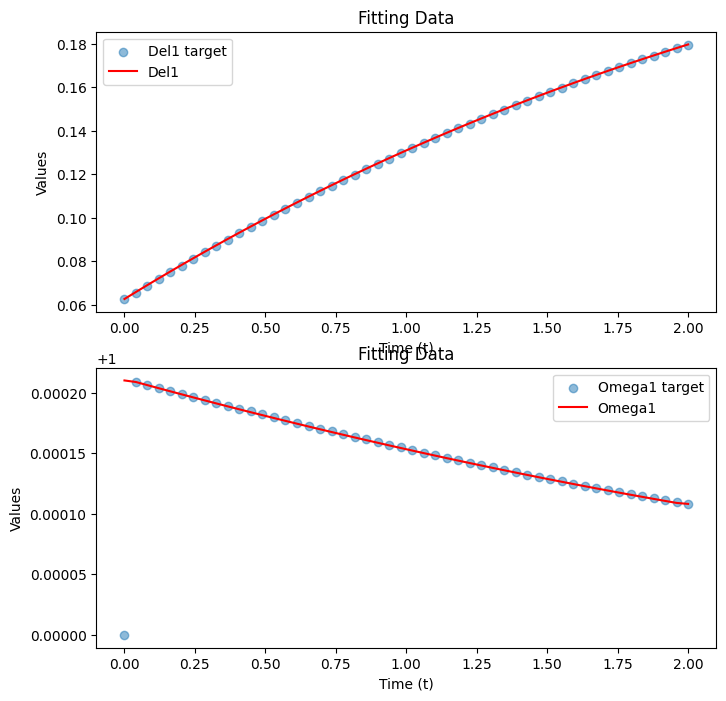

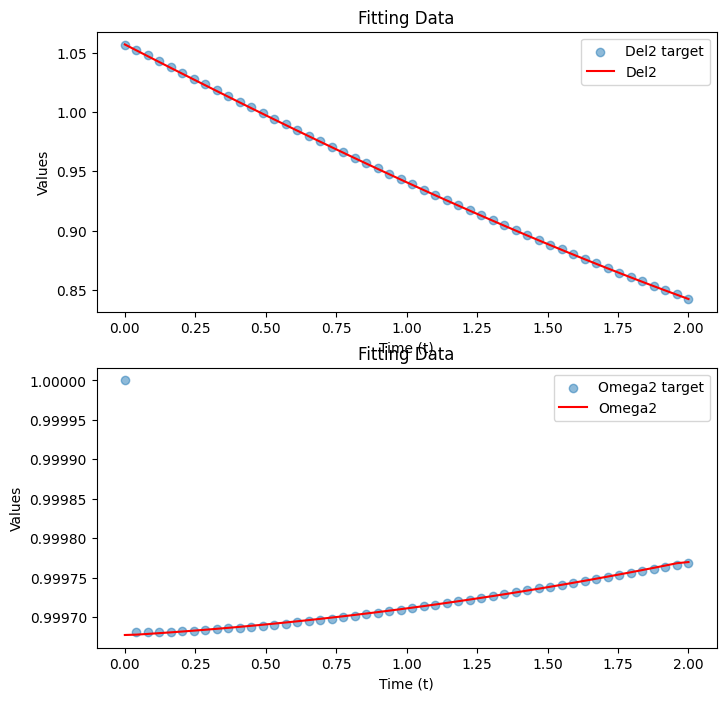

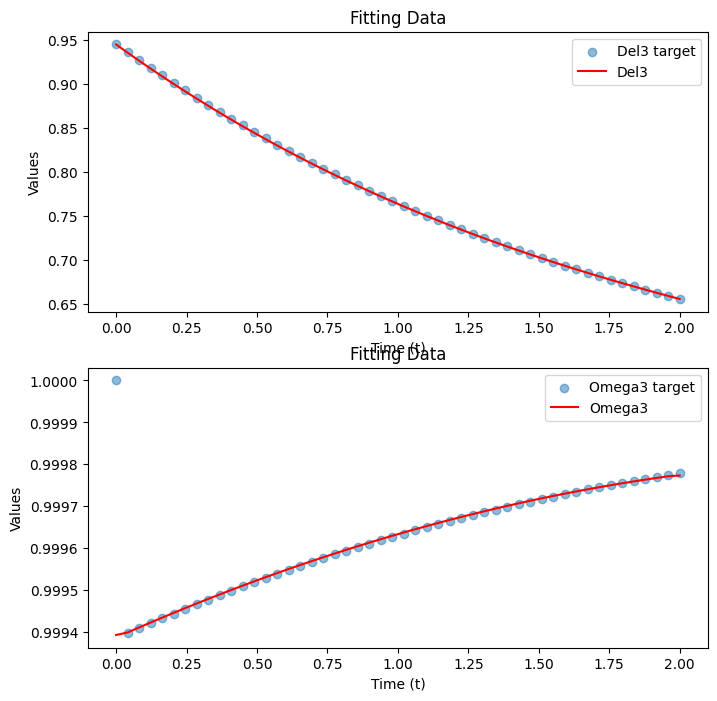

In [28]:
import matplotlib.pyplot as plt


# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delt1_pred = f_classical(a1, b1, c1, d1,t_data)
plt.plot(t_data, delt1_pred, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delt1_prime = np.gradient(delt1_pred, t_data)
fitted_values = (1/Ws)*delt1_prime+1
# fitted_values = (1/Ws)*f_classical_prime(a1,b1,c1,d1,t_data)+1
plt.plot(t_data, fitted_values, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delt2_pred = f_classical(a2, b2, c2, d2,t_data)
plt.plot(t_data, delt2_pred, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delt2_prime = np.gradient(delt2_pred, t_data)
fitted_values = (1/Ws)*delt2_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delt3_pred = f_classical(a3, b3, c3, d3,t_data)
plt.plot(t_data, delt3_pred, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delt3_prime = np.gradient(delt3_pred, t_data)
fitted_values = (1/Ws)*delt3_prime+1
plt.plot(t_data, fitted_values, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')